## Box plot

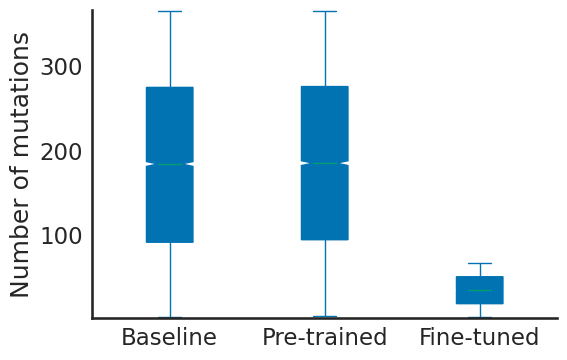

In [4]:
import plot_style_utils
import numpy as np

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

x = np.linspace(1, 367, 50)

train_10k = np.random.randint(2, 367, 10000)
prior_10k = np.random.randint(3, 367, 10000)
ft_prior_10k = np.random.randint(2, 67, 10000)
ylabel = "Number of mutations"


c = plot_style_utils.CAT_PALETTE[0]
ax.boxplot([train_10k, prior_10k, ft_prior_10k], 
            showfliers=False, notch=True, patch_artist=True, boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c), whiskerprops=dict(color=c),
            medianprops=dict(color=plot_style_utils.CAT_PALETTE[2]),
            )
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Baseline', 'Pre-trained', 'Fine-tuned'])
ax.set_ylabel(ylabel)

ax.set_ylim([1, 367])
plot_style_utils.save_for_pub(fig=fig, path="figures/gen_muts_boxplot")

# Dist plot

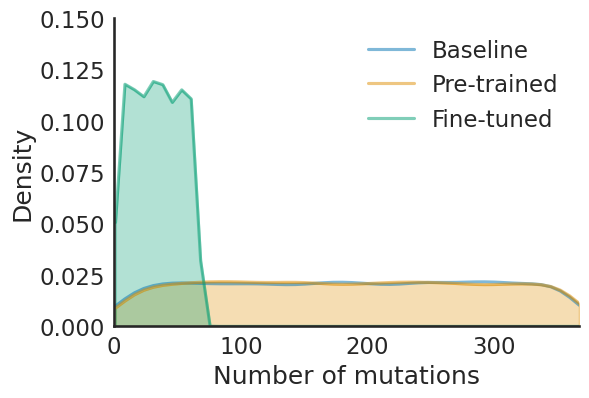

In [7]:
import plot_style_utils
import numpy as np
from scipy import stats

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

x = np.linspace(1, 367, 50)


train_propv = np.random.randint(2, 367, 10000)
prior_propv = np.random.randint(3, 367, 10000)
ft_prior_propv = np.random.randint(2, 67, 10000)
xlabel = 'Number of mutations'
    
y = stats.gaussian_kde(train_propv)(x)/sum(stats.gaussian_kde(train_propv)(x))
ax.plot(x, y, label="Baseline", alpha=0.5, color=plot_style_utils.CAT_PALETTE[0])

y = stats.gaussian_kde(prior_propv)(x)/sum(stats.gaussian_kde(prior_propv)(x))
ax.plot(x, y, label="Pre-trained", alpha=0.5, color=plot_style_utils.CAT_PALETTE[1])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[1])

y = stats.gaussian_kde(ft_prior_propv)(x)/sum(stats.gaussian_kde(ft_prior_propv)(x))
ax.plot(x, y, label="Fine-tuned", alpha=0.5, color=plot_style_utils.CAT_PALETTE[2])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[2])

ax.set_xlabel(xlabel)
ax.set_ylabel('Density')
ax.legend(frameon=False, loc="upper right")
ax.set_xlim([0, 367])
ax.set_ylim([0, 0.15])

plot_style_utils.save_for_pub(fig=fig, path="figures/gen_muts_density")